In [97]:
from ydata_profiling import ProfileReport

import numpy as np
import pandas as pd
%matplotlib inline

In [98]:
def load_dataset(filename, data_columns, target_column):
    df = pd.read_csv(filename)
    X, y = df[data_columns], df[target_column]
    return X, y

In [99]:
# Load data
data_columns = ["age", "sex", "bmi", "children", "smoker", "region"]
target_column = "charges"
X, y = load_dataset(r'C:\Users\Артем\vscode_source\MLIntro\LinearRegression\IW1\insurance.csv', data_columns, target_column)

X_true = X.copy()

# Map data
X["sex"] = X['sex'].map({'female': 1, 'male': 0}) 
X['smoker'] = X['smoker'].map({'yes': 1, 'no': 0})
X['region'] = X['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,0
1,18,0,33.770,1,0,1
2,28,0,33.000,3,0,1
3,33,0,22.705,0,0,2
4,32,0,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2
1334,18,1,31.920,0,0,3
1335,18,1,36.850,0,0,1
1336,21,1,25.800,0,0,0


D:\University\Semester_6\Machine_Learning\Machine_Learning\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\University\Semester_6\Machine_Learning\Machine_Learning\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\University\Semester_6\Machine_Learning\Machine_Learning\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\University\Semester_6\Machine_Learning\Machine_Learning\venv\Lib\site-packages\sea

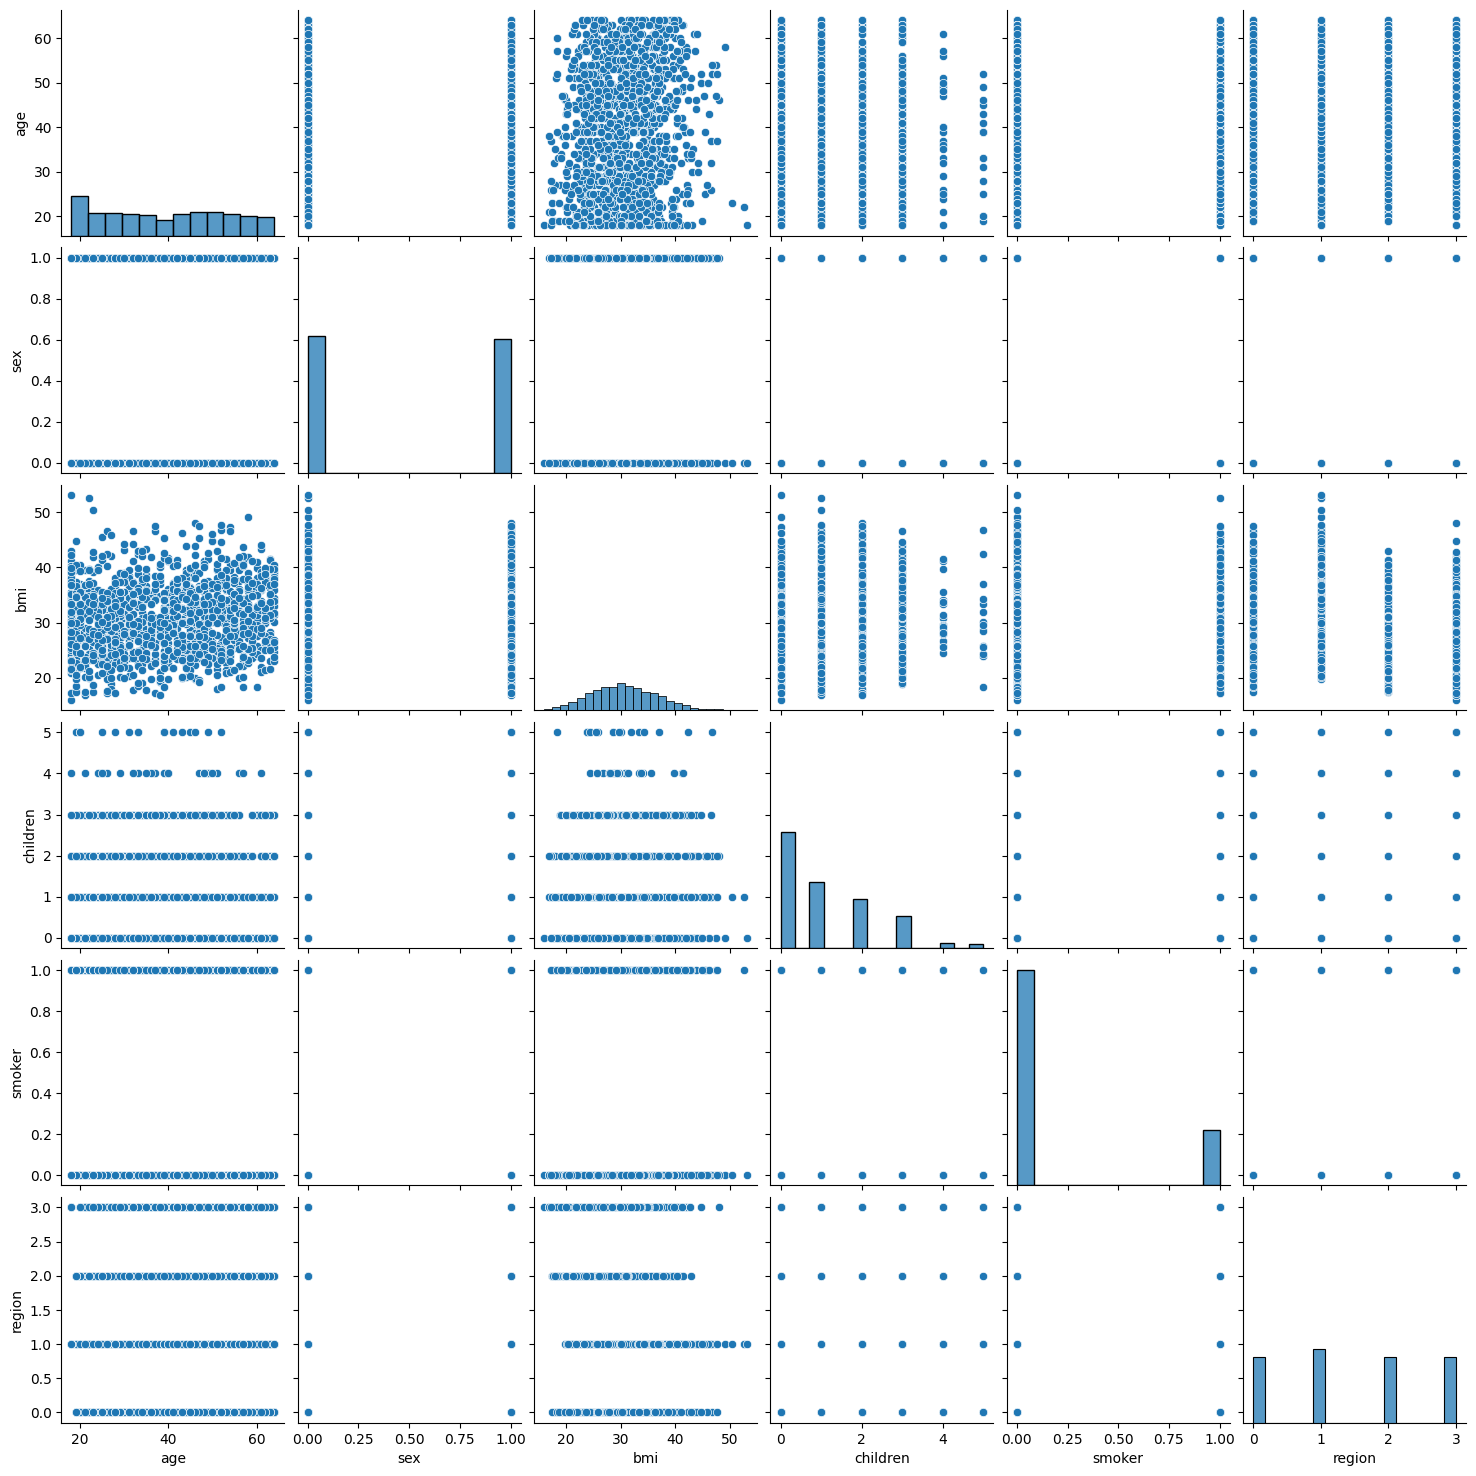

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(X)
plt.show()

In [101]:
# EDA
report = ProfileReport(X, title='Data Features', explorative=True)
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [102]:
def load_dataset_test(filename, data_columns, target_column):
    df = pd.read_csv(filename)
    X, y = df[data_columns].values, df[target_column].values
    return X, y.reshape(-1, 1)

In [103]:
# Load data
data_columns = ["age", "sex", "bmi", "children", "smoker", "region"]
target_column = "charges"
X_test, y_test = load_dataset_test(r'C:\Users\Артем\vscode_source\MLIntro\LinearRegression\IW1\insurance.csv', data_columns, target_column)

# Map data
X_test[:, 1] = np.where(X_test[:, 1] == 'female', 0, 1)
X_test[:, 4] = np.where(X_test[:, 4] == 'no', 0, 1)
class_mapping = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}
X_test[:, 5] = [class_mapping[value] for value in X_test[:, 5]]

X_test

array([[19, 0, 27.9, 0, 1, 0],
       [18, 1, 33.77, 1, 0, 1],
       [28, 1, 33.0, 3, 0, 1],
       ...,
       [18, 0, 36.85, 0, 0, 1],
       [21, 0, 25.8, 0, 0, 0],
       [61, 0, 29.07, 0, 1, 2]], dtype=object)

In [104]:
X_test_df = pd.DataFrame(X_test)
report_test = ProfileReport(X_test_df, title='Data Features Test', explorative=True)
report_test.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]